# Data Cleaning: NBA Data for MVP Predictions

We've done web scraping on `1-web_scraping.ipynb`, and now in this file we'll do data cleaning. Keep in mind that our goal is make a bigger picture of dataset so we can apply it into machine learning for MVP prediction, and by this goal we may clean a lot in the datasets. There's going to be a lot of short-term columns, for reference we can go to the glossaries on the website [here](https://www.basketball-reference.com/about/glossary.html).

In [1]:
import pandas as pd

In [2]:
# Load the datasets we've collected
mvps    = pd.read_csv('mvps.csv')
players = pd.read_csv('players.csv')
teams   = pd.read_csv('teams.csv')

## `mvps.csv` - MVPs in Every Year

In [3]:
mvps

,Unnamed: 0,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,0,1,Shaquille O'Neal,27,LAL,120.0,1207.0,1210,0.998,79,...,13.6,3.8,0.5,3.0,0.574,0.000,0.524,18.6,0.283,2000
1,1,2,Kevin Garnett,23,MIN,0.0,408.0,1210,0.337,81,...,11.8,5.0,1.5,1.6,0.497,0.370,0.765,11.6,0.172,2000
2,2,3,Alonzo Mourning,29,MIA,0.0,367.0,1210,0.303,79,...,9.5,1.6,0.5,3.7,0.551,0.000,0.711,12.9,0.226,2000
3,3,4,Karl Malone,36,UTA,0.0,312.0,1210,0.258,82,...,9.5,3.7,1.0,0.9,0.509,0.250,0.797,15.3,0.249,2000
4,4,5,Tim Duncan,23,SAS,0.0,248.0,1210,0.205,74,...,12.4,3.2,0.9,2.2,0.490,0.091,0.761,13.0,0.218,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,8,9,Stephen Curry,34,GSW,0.0,5.0,1000,0.005,56,...,6.1,6.3,0.9,0.4,0.493,0.427,0.915,7.8,0.192,2023
335,9,10,Jimmy Butler,33,MIA,0.0,3.0,1000,0.003,64,...,5.9,5.3,1.8,0.3,0.539,0.350,0.850,12.3,0.277,2023
336,10,11,De'Aaron Fox,25,SAC,0.0,2.0,1000,0.002,73,...,4.2,6.1,1.1,0.3,0.512,0.324,0.780,7.4,0.146,2023
337,11,12T,Jalen Brunson,26,NYK,0.0,1.0,1000,0.001,68,...,3.5,6.2,0.9,0.2,0.491,0.416,0.829,8.7,0.175,2023


In [4]:
mvps.columns

Index(['Unnamed: 0', 'Rank', 'Player', 'Age', 'Tm', 'First', 'Pts Won',
       'Pts Max', 'Share', 'G', 'MP', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%',
       '3P%', 'FT%', 'WS', 'WS/48', 'Year'],
      dtype='object')

Since we're on the focus of MVP in a given season, we need relevant columns that portray as the parameter of MVP. We don't need the stats since we'll have it in the yearly stat of `players.csv`. Later we'll unite all the datasets into one for a bigger picture.

In [5]:
mvps = mvps[['Player', 'Year', 'Pts Won', 'Pts Max', 'Share']]

In [6]:
mvps.head()

,Player,Year,Pts Won,Pts Max,Share
0,Shaquille O'Neal,2000,1207.0,1210,0.998
1,Kevin Garnett,2000,408.0,1210,0.337
2,Alonzo Mourning,2000,367.0,1210,0.303
3,Karl Malone,2000,312.0,1210,0.258
4,Tim Duncan,2000,248.0,1210,0.205


## `players.csv` - Player's Performance Stats

Our goal here is to `merge()` the cleaned `mvps` into `players`. We need to make sure the name's the same or else the merging would result in some blank spaces.

In [7]:
players

,Unnamed: 0,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,0,1,Tariq Abdul-Wahad,SG,25,TOT,61,56,25.9,4.5,...,1.7,3.1,4.8,1.6,1.0,0.5,1.7,2.4,11.4,2000
1,1,1,Tariq Abdul-Wahad,SG,25,ORL,46,46,26.2,4.8,...,1.7,3.5,5.2,1.6,1.2,0.3,1.9,2.5,12.2,2000
2,2,1,Tariq Abdul-Wahad,SG,25,DEN,15,10,24.9,3.4,...,1.6,1.9,3.5,1.7,0.4,0.8,1.3,2.1,8.9,2000
3,3,2,Shareef Abdur-Rahim,SF,23,VAN,82,82,39.3,7.2,...,2.7,7.4,10.1,3.3,1.1,1.1,3.0,3.0,20.3,2000
4,4,3,Cory Alexander,PG,26,DEN,29,2,11.3,1.0,...,0.3,1.2,1.4,2.0,0.8,0.1,1.0,1.3,2.8,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14957,699,535,Thaddeus Young,PF,34,TOR,54,9,14.7,2.0,...,1.3,1.8,3.1,1.4,1.0,0.1,0.8,1.6,4.4,2023
14958,700,536,Trae Young,PG,24,ATL,73,73,34.8,8.2,...,0.8,2.2,3.0,10.2,1.1,0.1,4.1,1.4,26.2,2023
14959,701,537,Omer Yurtseven,C,24,MIA,9,0,9.2,1.8,...,0.9,1.7,2.6,0.2,0.2,0.2,0.4,1.8,4.4,2023
14960,702,538,Cody Zeller,C,30,MIA,15,2,14.5,2.5,...,1.7,2.6,4.3,0.7,0.2,0.3,0.9,2.2,6.5,2023


In [8]:
## Delete irrelevant data
del players['Unnamed: 0']
del players['Rk']

In [9]:
players['Player'].head(50)

0       Tariq Abdul-Wahad
1       Tariq Abdul-Wahad
2       Tariq Abdul-Wahad
3     Shareef Abdur-Rahim
4          Cory Alexander
5              Ray Allen*
6            Rafer Alston
7            John Amaechi
8          Derek Anderson
9          Kenny Anderson
10          Nick Anderson
11       Shandon Anderson
12           Chris Anstey
13           Greg Anthony
14         B.J. Armstrong
15      Darrell Armstrong
16          Chucky Atkins
17          Stacey Augmon
18           Isaac Austin
19          Anthony Avent
20          William Avery
21            Toby Bailey
22              Vin Baker
23       Charles Barkley*
24            Dana Barros
25            Brent Barry
26             Drew Barry
27             Drew Barry
28             Drew Barry
29              Jon Barry
30            Tony Battie
31        Jonathan Bender
32        Benoit Benjamin
33         Corey Benjamin
34          Mario Bennett
35            Travis Best
36             Mike Bibby
37       Chauncey Billups
38        Mo

* We can see there are names that are suffixed by asterisk (`*`). We need to clean them out.
* Also there are players with more than one column in a year, take the first data for example. Player `Tariq Abdul-Wahad` has three columns with different teams in 2000: `TOT`, `ORL`, and `DEN`. We'll only be taking the total stats (`TOT`).

In [10]:
players['Player'] = players['Player'].str.replace('*', '', regex=False)

In [11]:
def single_row(df):
    
    if df.shape[0] == 1:
        return df
    else:
        row = df[df['Tm'] == 'TOT']
        row['Tm'] = df.iloc[-1,:]['Tm']
        return row

players = players.groupby(['Player', 'Year']).apply(single_row)

In [12]:
players.head(50)

Player Pos Age   Tm   G  GS    MP   FG  \
Player         Year                                                         
A.C. Green     2000 184        A.C. Green  PF  36  LAL  82  82  23.5  2.1   
               2001 703        A.C. Green  PF  37  MIA  82   1  17.2  1.8   
A.J. Bramlett  2000 57      A.J. Bramlett   C  23  CLE   8   0   7.6  0.5   
A.J. Green     2023 14488      A.J. Green  SG  23  MIL  35   1   9.9  1.5   
A.J. Guyton    2001 706       A.J. Guyton  PG  22  CHI  33   8  19.1  2.4   
               2002 1259      A.J. Guyton  PG  23  CHI  45   6  13.5  2.0   
               2003 1766      A.J. Guyton  PG  24  GSW   2   0   4.5  0.0   
A.J. Hammons   2017 10187    A.J. Hammons   C  24  DAL  22   0   7.4  0.8   
A.J. Lawson    2023 14632     A.J. Lawson  SG  22  DAL  15   0   7.2  1.5   
A.J. Price     2010 6100       A.J. Price  PG  23  IND  56   2  15.4  2.6   
               2011 6729       A.J. Price  PG  24  IND  50   0  15.9  2.3   
               2012 7313       A.J. Price  PG  25  IND  44   1  12.9  1.3   
               2013 7905       A.J. Price  PG  26  WAS  57  22  22.4  2.8   
               2014 8535       A.J. Price  SG  27  MIN  28   0   3.5  0.7   
               2015 9183       A.J. Price  PG  28  PHO  26   0  12.5  2.0   
AJ Griffin     2023 14499      AJ Griffin  SF  19  ATL  72  12  19.5  3.4   
Aaron Brooks   2008 4504     Aaron Brooks  PG  23  HOU  51   0  11.9  1.8   
               2009 5125     Aaron Brooks  PG  24  HOU  80  35  25.0  4.0   
               2010 5726     Aaron Brooks  PG  25  HOU  82  82  35.6  7.0   
               2011 6342     Aaron Brooks  PG  26  PHO  59  12  21.8  3.7   
               2013 7541     Aaron Brooks  PG  28  HOU  53  20  18.8  2.7   
               2014 8149     Aaron Brooks  PG  29  DEN  72  12  21.6  3.2   
               2015 8773     Aaron Brooks  PG  30  CHI  82  21  23.0  4.2   
               2016 9438     Aaron Brooks  PG  31  CHI  69   0  16.1  2.7   
               2017 10041    Aaron Brooks  PG  32  IND  65   0  13.8  1.9   
               2018 10670    Aaron Brooks  PG  33  MIN  32   1   5.9  0.9   
Aaron Gordon   2015 8927     Aaron Gordon  PF  19  ORL  47   8  17.0  2.0   
               2016 9559     Aaron Gordon  PF  20  ORL  78  37  23.9  3.5   
               2017 10171    Aaron Gordon  SF  21  ORL  80  72  28.7  4.9   
               2018 10812    Aaron Gordon  PF  22  ORL  58  57  32.9  6.5   
               2019 11535    Aaron Gordon  PF  23  ORL  78  78  33.8  6.0   
               2020 12250    Aaron Gordon  PF  24  ORL  62  62  32.5  5.4   
               2021 12926    Aaron Gordon  PF  25  DEN  50  50  27.7  4.6   
               2022 13685    Aaron Gordon  PF  26  DEN  75  75  31.7  5.8   
               2023 14479    Aaron Gordon  PF  27  DEN  68  68  30.2  6.3   
Aaron Gray     2008 4644       Aaron Gray   C  23  CHI  61   1  10.0  1.7   
               2009 5265       Aaron Gray   C  24  CHI  56  18  12.8  1.4   
               2010 5855       Aaron Gray   C  25  NOH  32   0   9.7  1.3   
               2011 6506       Aaron Gray   C  26  NOH  41   6  13.0  1.4   
               2012 7103       Aaron Gray   C  27  TOR  49  40  16.6  1.7   
               2013 7668       Aaron Gray   C  28  TOR  42  16  12.2  1.1   
               2014 8304       Aaron Gray   C  29  SAC  37   6   9.6  0.7   
Aaron Harrison 2016 9595   Aaron Harrison  SG  21  CHO  21   0   4.4  0.2   
               2017 10199  Aaron Harrison  SG  22  CHO   5   0   3.4  0.0   
               2018 10842  Aaron Harrison  SG  23  DAL   9   3  25.9  2.1   
Aaron Henry    2022 13730     Aaron Henry  SF  22  PHI   6   0   2.8  0.2   
Aaron Holiday  2019 11588   Aaron Holiday  PG  22  IND  50   0  12.9  2.1   
               2020 12311   Aaron Holiday  PG  23  IND  66  33  24.5  3.5   
               2021 12990   Aaron Holiday  PG  24  IND  66   8  17.8  2.6   
               2022 13749   Aaron Holiday  PG  25  PHO  63  15  16.2  2.4   

                            FG

In [13]:
# Drop the index [['Player', 'Year']] on the upper left.
# This format makes the DataFrame hard to edit.
players.index = players.index.droplevel()
players.index = players.index.droplevel()

In [14]:
# Check:
players[players['Player'] == 'Tariq Abdul-Wahad']

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Tariq Abdul-Wahad,SG,25,DEN,61,56,25.9,4.5,10.6,.424,...,1.7,3.1,4.8,1.6,1.0,0.5,1.7,2.4,11.4,2000
517,Tariq Abdul-Wahad,SG,26,DEN,29,12,14.5,1.5,3.8,.387,...,0.5,1.6,2.0,0.8,0.5,0.4,1.2,1.9,3.8,2001
1074,Tariq Abdul-Wahad,SG,27,DAL,24,12,18.4,2.3,6.1,.374,...,1.7,1.8,3.5,1.0,0.8,0.4,1.1,2.3,5.6,2002
1594,Tariq Abdul-Wahad,SG,28,DAL,14,0,14.6,1.9,4.1,.466,...,1.0,1.9,2.9,1.5,0.4,0.2,0.5,1.9,4.1,2003


Now we've cleaned the asterisk and make a single data in every year, let's merge both tables. Since not every data of `players` (all players) are in `mvps` (best players), we'll do `outer` join, so `players` act as the base.

In [15]:
combined = players.merge(mvps, how='outer', on=['Player', 'Year'])

In [16]:
combined.head(10)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,A.C. Green,PF,36,LAL,82,82,23.5,2.1,4.7,.447,...,1.0,0.6,0.2,0.6,1.5,5.0,2000,NaN,NaN,NaN
1,A.C. Green,PF,37,MIA,82,1,17.2,1.8,4.0,.444,...,0.5,0.4,0.1,0.5,1.5,4.5,2001,NaN,NaN,NaN
2,A.J. Bramlett,C,23,CLE,8,0,7.6,0.5,2.6,.190,...,0.0,0.1,0.0,0.4,1.6,1.0,2000,NaN,NaN,NaN
3,A.J. Green,SG,23,MIL,35,1,9.9,1.5,3.6,.424,...,0.6,0.2,0.0,0.3,0.9,4.4,2023,NaN,NaN,NaN
4,A.J. Guyton,PG,22,CHI,33,8,19.1,2.4,5.8,.406,...,1.9,0.3,0.2,0.7,1.1,6.0,2001,NaN,NaN,NaN
5,A.J. Guyton,PG,23,CHI,45,6,13.5,2.0,5.4,.361,...,1.8,0.2,0.2,0.8,0.5,5.4,2002,NaN,NaN,NaN
6,A.J. Guyton,PG,24,GSW,2,0,4.5,0.0,2.0,.000,...,1.0,0.5,0.0,0.5,0.0,0.0,2003,NaN,NaN,NaN
7,A.J. Hammons,C,24,DAL,22,0,7.4,0.8,1.9,.405,...,0.2,0.0,0.6,0.5,1.0,2.2,2017,NaN,NaN,NaN
8,A.J. Lawson,SG,22,DAL,15,0,7.2,1.5,2.9,.500,...,0.1,0.1,0.0,0.2,0.7,3.7,2023,NaN,NaN,NaN
9,A.J. Price,PG,23,IND,56,2,15.4,2.6,6.3,.410,...,1.9,0.6,0.1,1.1,0.9,7.3,2010,NaN,NaN,NaN


In [17]:
combined[combined['Pts Won'] > 0]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
161,Al Jefferson,C,29,CHA,73,73,35.0,9.6,18.8,.509,...,2.1,0.9,1.1,1.7,2.4,21.8,2014,34.0,1250.0,0.027
287,Allen Iverson,SG,24,PHI,70,70,40.8,10.4,24.8,.421,...,4.7,2.1,0.1,3.3,2.3,28.4,2000,132.0,1210.0,0.109
288,Allen Iverson,SG,25,PHI,71,71,42.0,10.7,25.5,.420,...,4.6,2.5,0.3,3.3,2.1,31.1,2001,1121.0,1240.0,0.904
289,Allen Iverson,SG,26,PHI,60,59,43.7,11.1,27.8,.398,...,5.5,2.8,0.2,4.0,1.7,31.4,2002,29.0,1260.0,0.023
290,Allen Iverson,SG,27,PHI,82,82,42.5,9.8,23.7,.414,...,5.5,2.7,0.2,3.5,1.8,27.6,2003,83.0,1190.0,0.070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11097,Vince Carter,SF,23,TOR,82,82,38.1,9.6,20.7,.465,...,3.9,1.3,1.1,2.2,3.2,25.7,2000,51.0,1210.0,0.042
11098,Vince Carter,SF,24,TOR,75,75,39.7,10.2,22.1,.460,...,3.9,1.5,1.1,2.2,2.7,27.6,2001,7.0,1240.0,0.006
11102,Vince Carter,SF-SG,28,NJN,77,76,36.7,9.0,20.0,.452,...,4.2,1.4,0.6,2.2,3.2,24.5,2005,3.0,1270.0,0.002
11381,Yao Ming,C,23,HOU,82,82,32.8,6.5,12.5,.522,...,1.5,0.3,1.9,2.5,3.3,17.5,2004,1.0,1230.0,0.001


As you may notice, the data of players who are not in `mvps` like `Pts Won`, `Pts Msx`, and `Share` are put as `NaN` or missing values. This can be quite problematic when applying to the model since there are no values there. We can change it to `0` instead.

In [18]:
combined[['Pts Won', 'Pts Max', 'Share']] = (
    combined[['Pts Won', 'Pts Max', 'Share']].fillna(0)
)

In [19]:
combined

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,A.C. Green,PF,36,LAL,82,82,23.5,2.1,4.7,.447,...,1.0,0.6,0.2,0.6,1.5,5.0,2000,0.0,0.0,0.0
1,A.C. Green,PF,37,MIA,82,1,17.2,1.8,4.0,.444,...,0.5,0.4,0.1,0.5,1.5,4.5,2001,0.0,0.0,0.0
2,A.J. Bramlett,C,23,CLE,8,0,7.6,0.5,2.6,.190,...,0.0,0.1,0.0,0.4,1.6,1.0,2000,0.0,0.0,0.0
3,A.J. Green,SG,23,MIL,35,1,9.9,1.5,3.6,.424,...,0.6,0.2,0.0,0.3,0.9,4.4,2023,0.0,0.0,0.0
4,A.J. Guyton,PG,22,CHI,33,8,19.1,2.4,5.8,.406,...,1.9,0.3,0.2,0.7,1.1,6.0,2001,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11514,Željko Rebrača,C,29,DET,74,4,15.9,2.6,5.1,.505,...,0.5,0.4,1.0,1.1,2.6,6.9,2002,0.0,0.0,0.0
11515,Željko Rebrača,C,30,DET,30,12,16.3,2.7,4.8,.552,...,0.3,0.2,0.6,1.0,2.6,6.6,2003,0.0,0.0,0.0
11516,Željko Rebrača,C,31,ATL,24,2,11.4,1.4,3.2,.442,...,0.3,0.2,0.5,0.7,2.2,3.8,2004,0.0,0.0,0.0
11517,Željko Rebrača,C,32,LAC,58,2,16.0,2.3,4.0,.568,...,0.4,0.2,0.7,0.8,2.2,5.8,2005,0.0,0.0,0.0


## `teams.csv` - Team Data

In [20]:
teams.head(20)

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,52,30,.634,—,94.4,91.3,2.75,2000,Miami Heat*
1,1,50,32,.610,2.0,92.1,90.7,1.30,2000,New York Knicks*
2,2,49,33,.598,3.0,94.8,93.4,1.02,2000,Philadelphia 76ers*
3,3,41,41,.500,11.0,100.1,99.4,0.43,2000,Orlando Magic
4,4,35,47,.427,17.0,99.3,100.1,-1.00,2000,Boston Celtics
5,5,31,51,.378,21.0,98.0,99.0,-1.18,2000,New Jersey Nets
6,6,29,53,.354,23.0,96.6,99.9,-3.47,2000,Washington Wizards
7,7,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,2000,Central Division
8,8,56,26,.683,—,101.3,96.7,4.15,2000,Indiana Pacers*
9,9,49,33,.598,7.0,98.4,95.8,2.33,2000,Charlotte Hornets*


* We're noticing there is a `Central Division` and a`Midwest Division`  all across the columns. This is artefact of web scraping we can clean.
* Same case with `players`, there are also several teams with an asterisk in the end. There's `Unnamed: 0` too. Let's clean them out.

In [21]:
## Clean the artefacts
teams = teams[~ teams['W'].str.contains('Division')]

## Clean the asterisks
teams['Team'] = teams['Team'].str.replace('*', '', regex=False)

## Clean `Unnamed: 0`
del teams['Unnamed: 0']

In [22]:
teams.head(5)

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,52,30,.634,—,94.4,91.3,2.75,2000,Miami Heat
1,50,32,.610,2.0,92.1,90.7,1.30,2000,New York Knicks
2,49,33,.598,3.0,94.8,93.4,1.02,2000,Philadelphia 76ers
3,41,41,.500,11.0,100.1,99.4,0.43,2000,Orlando Magic
4,35,47,.427,17.0,99.3,100.1,-1.00,2000,Boston Celtics


One more thing before we go. Our goal is to `merge()` them in columns of `Team` in `teams` or `Tm` in `combined`. However, `combined`'s `Tm` are in abbreviation, while `teams`' `Team` are in the long-term. We can unite this by a file we've made called `nicknames.txt`.

In [23]:
teams['Team'].unique()

array(['Miami Heat', 'New York Knicks', 'Philadelphia 76ers',
       'Orlando Magic', 'Boston Celtics', 'New Jersey Nets',
       'Washington Wizards', 'Indiana Pacers', 'Charlotte Hornets',
       'Toronto Raptors', 'Detroit Pistons', 'Milwaukee Bucks',
       'Cleveland Cavaliers', 'Atlanta Hawks', 'Chicago Bulls',
       'Utah Jazz', 'San Antonio Spurs', 'Minnesota Timberwolves',
       'Dallas Mavericks', 'Denver Nuggets', 'Houston Rockets',
       'Vancouver Grizzlies', 'Los Angeles Lakers',
       'Portland Trail Blazers', 'Phoenix Suns', 'Seattle SuperSonics',
       'Sacramento Kings', 'Golden State Warriors',
       'Los Angeles Clippers', 'Memphis Grizzlies', 'New Orleans Hornets',
       'Charlotte Bobcats', 'New Orleans/Oklahoma City Hornets',
       'Oklahoma City Thunder', 'Brooklyn Nets', 'New Orleans Pelicans'],
      dtype=object)

In [24]:
combined['Tm'].unique()

array(['LAL', 'MIA', 'CLE', 'MIL', 'CHI', 'GSW', 'DAL', 'IND', 'WAS',
       'MIN', 'PHO', 'ATL', 'HOU', 'DEN', 'ORL', 'NOH', 'TOR', 'SAC',
       'CHO', 'PHI', 'BOS', 'OKC', 'NJN', 'NOK', 'LAC', 'UTA', 'CHA',
       'MEM', 'SEA', 'NYK', 'NOP', 'POR', 'BRK', 'DET', 'SAS', 'CHH',
       'VAN'], dtype=object)

In [25]:
nicknames = {}

with open('nicknames.csv') as f:
    lines = f.readlines()
    
    for line in lines[1:]:
        abbrev, name = line.replace('\n', '').split(',')
        nicknames[abbrev] = name

In [26]:
combined['Team'] = combined['Tm'].map(nicknames)

In [27]:
combined.head(5)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team
0,A.C. Green,PF,36,LAL,82,82,23.5,2.1,4.7,.447,...,0.6,0.2,0.6,1.5,5.0,2000,0.0,0.0,0.0,Los Angeles Lakers
1,A.C. Green,PF,37,MIA,82,1,17.2,1.8,4.0,.444,...,0.4,0.1,0.5,1.5,4.5,2001,0.0,0.0,0.0,Miami Heat
2,A.J. Bramlett,C,23,CLE,8,0,7.6,0.5,2.6,.190,...,0.1,0.0,0.4,1.6,1.0,2000,0.0,0.0,0.0,Cleveland Cavaliers
3,A.J. Green,SG,23,MIL,35,1,9.9,1.5,3.6,.424,...,0.2,0.0,0.3,0.9,4.4,2023,0.0,0.0,0.0,Milwaukee Bucks
4,A.J. Guyton,PG,22,CHI,33,8,19.1,2.4,5.8,.406,...,0.3,0.2,0.7,1.1,6.0,2001,0.0,0.0,0.0,Chicago Bulls


Now let's merge them. `outer` join, so no lost data.

In [28]:
stats = combined.merge(teams, how='outer', on=['Team', 'Year'])

In [29]:
stats

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,PF,36,LAL,82,82,23.5,2.1,4.7,.447,...,0.0,0.0,Los Angeles Lakers,67,15,.817,—,100.8,92.3,8.41
1,Brian Shaw,SG,33,LAL,74,2,16.9,1.7,4.4,.382,...,0.0,0.0,Los Angeles Lakers,67,15,.817,—,100.8,92.3,8.41
2,Derek Fisher,PG,25,LAL,78,22,23.1,2.1,6.2,.346,...,0.0,0.0,Los Angeles Lakers,67,15,.817,—,100.8,92.3,8.41
3,Devean George,SF,22,LAL,49,1,7.0,1.1,2.9,.389,...,0.0,0.0,Los Angeles Lakers,67,15,.817,—,100.8,92.3,8.41
4,Glen Rice,SF,32,LAL,80,80,31.6,5.3,12.3,.430,...,0.0,0.0,Los Angeles Lakers,67,15,.817,—,100.8,92.3,8.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11514,Spencer Hawes,PF,28,MIL,54,1,14.8,2.5,5.1,.484,...,0.0,0.0,Milwaukee Bucks,42,40,.512,9.0,103.6,103.8,-0.45
11515,Steve Novak,PF,33,MIL,8,0,2.8,0.3,0.9,.286,...,0.0,0.0,Milwaukee Bucks,42,40,.512,9.0,103.6,103.8,-0.45
11516,Terrence Jones,PF,25,MIL,54,12,23.5,4.3,9.1,.470,...,0.0,0.0,Milwaukee Bucks,42,40,.512,9.0,103.6,103.8,-0.45
11517,Thon Maker,C,19,MIL,57,34,9.9,1.5,3.2,.459,...,0.0,0.0,Milwaukee Bucks,42,40,.512,9.0,103.6,103.8,-0.45


In [30]:
combined

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team
0,A.C. Green,PF,36,LAL,82,82,23.5,2.1,4.7,.447,...,0.6,0.2,0.6,1.5,5.0,2000,0.0,0.0,0.0,Los Angeles Lakers
1,A.C. Green,PF,37,MIA,82,1,17.2,1.8,4.0,.444,...,0.4,0.1,0.5,1.5,4.5,2001,0.0,0.0,0.0,Miami Heat
2,A.J. Bramlett,C,23,CLE,8,0,7.6,0.5,2.6,.190,...,0.1,0.0,0.4,1.6,1.0,2000,0.0,0.0,0.0,Cleveland Cavaliers
3,A.J. Green,SG,23,MIL,35,1,9.9,1.5,3.6,.424,...,0.2,0.0,0.3,0.9,4.4,2023,0.0,0.0,0.0,Milwaukee Bucks
4,A.J. Guyton,PG,22,CHI,33,8,19.1,2.4,5.8,.406,...,0.3,0.2,0.7,1.1,6.0,2001,0.0,0.0,0.0,Chicago Bulls
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11514,Željko Rebrača,C,29,DET,74,4,15.9,2.6,5.1,.505,...,0.4,1.0,1.1,2.6,6.9,2002,0.0,0.0,0.0,Detroit Pistons
11515,Željko Rebrača,C,30,DET,30,12,16.3,2.7,4.8,.552,...,0.2,0.6,1.0,2.6,6.6,2003,0.0,0.0,0.0,Detroit Pistons
11516,Željko Rebrača,C,31,ATL,24,2,11.4,1.4,3.2,.442,...,0.2,0.5,0.7,2.2,3.8,2004,0.0,0.0,0.0,Atlanta Hawks
11517,Željko Rebrača,C,32,LAC,58,2,16.0,2.3,4.0,.568,...,0.2,0.7,0.8,2.2,5.8,2005,0.0,0.0,0.0,Los Angeles Clippers


11519 rows on both tables--No additional rows. Sweet!

Now to put the data in machine learning for numerical values (this data is one), we need to make sure the data types fit, in here we need the numbers as  `int64` or `float64`. 

In [31]:
stats.dtypes

Player      object
Pos         object
Age         object
Tm          object
G           object
GS          object
MP          object
FG          object
FGA         object
FG%         object
3P          object
3PA         object
3P%         object
2P          object
2PA         object
2P%         object
eFG%        object
FT          object
FTA         object
FT%         object
ORB         object
DRB         object
TRB         object
AST         object
STL         object
BLK         object
TOV         object
PF          object
PTS         object
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W           object
L           object
W/L%        object
GB          object
PS/G        object
PA/G        object
SRS         object
dtype: object

In [32]:
# Change the data types, ignore the errors (if the row values are string)
stats = stats.apply(pd.to_numeric, errors='ignore')

In [33]:
stats.dtypes

Player      object
Pos         object
Age          int64
Tm          object
G            int64
GS           int64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W            int64
L            int64
W/L%       float64
GB          object
PS/G       float64
PA/G       float64
SRS        float64
dtype: object

In [34]:
stats['GB'].unique()

array(['—', '6.0', '24.0', '37.0', '29.0', '21.0', '28.0', '13.0', '25.0',
       '8.0', '19.0', '3.0', '1.0', '17.0', '23.0', '15.0', '9.0', '2.0',
       '35.0', '20.0', '11.0', '5.0', '26.0', '18.0', '16.0', '41.0',
       '12.0', '14.0', '30.0', '34.0', '4.0', '1.5', '43.0', '39.0',
       '18.5', '31.0', '10.0', '48.0', '40.0', '7.0', '46.0', '22.0',
       '10.5', '32.0', '38.0', '27.0', '33.0', '50.0', '21.5', '45.0',
       '22.5', '25.5', '36.0', '3.5', '20.5', '11.5', '52.0', '56.0',
       '2.5', '12.5', '32.5', '4.5'], dtype=object)

There are still one column `GB` with `object` with a distinct dash that makes it one. If you look closely, it's not the regular daash `-`, hence we could copy the character to get it cleaned.

In [35]:
stats['GB'] = stats['GB'].replace('—', '0').apply(pd.to_numeric)

In [36]:
stats.dtypes

Player      object
Pos         object
Age          int64
Tm          object
G            int64
GS           int64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W            int64
L            int64
W/L%       float64
GB         float64
PS/G       float64
PA/G       float64
SRS        float64
dtype: object

In [37]:
stats[stats['Share'] > 0]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
7,Kobe Bryant,SG,21,LAL,66,62,38.2,8.4,17.9,0.468,...,1210.0,0.002,Los Angeles Lakers,67,15,0.817,0.0,100.8,92.3,8.41
11,Shaquille O'Neal,C,27,LAL,79,79,40.0,12.1,21.1,0.574,...,1210.0,0.998,Los Angeles Lakers,67,15,0.817,0.0,100.8,92.3,8.41
17,Anthony Mason,PF,34,MIA,80,80,40.7,5.8,11.9,0.482,...,1240.0,0.001,Miami Heat,50,32,0.610,6.0,88.9,86.6,1.73
51,Giannis Antetokounmpo,PF,28,MIL,63,63,32.1,11.2,20.3,0.553,...,1000.0,0.606,Milwaukee Bucks,58,24,0.707,0.0,116.9,113.3,3.61
143,Luka Dončić,PG,23,DAL,66,66,36.2,10.9,22.0,0.496,...,1000.0,0.010,Dallas Mavericks,38,44,0.463,13.0,114.2,114.1,-0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11320,Kevin Garnett,PF,27,MIN,82,82,39.4,9.8,19.6,0.499,...,1230.0,0.991,Minnesota Timberwolves,58,24,0.707,0.0,94.5,89.1,5.86
11327,Sam Cassell,PG,34,MIN,81,81,35.0,7.7,15.7,0.488,...,1230.0,0.003,Minnesota Timberwolves,58,24,0.707,0.0,94.5,89.1,5.86
11342,Ray Allen,SG,25,MIL,82,82,38.2,7.7,16.0,0.480,...,1240.0,0.006,Milwaukee Bucks,52,30,0.634,0.0,100.7,96.9,3.14
11429,Jalen Brunson,PG,26,NYK,68,68,35.0,8.6,17.6,0.491,...,1000.0,0.001,New York Knicks,47,35,0.573,10.0,116.0,113.1,2.99


All clean! Now we can save it into a whole `.csv` spreadsheet.

In [38]:
stats.to_csv('player_mvp_stats.csv')

## Data Exploration

Now let's see some insights before we put it in machine learning. 

In [39]:
# Highest scores each year
highest_scoring = stats.groupby('Year').apply(
    lambda x: x.sort_values('PTS', ascending=False).head(1))

<Axes: ylabel='Year'>

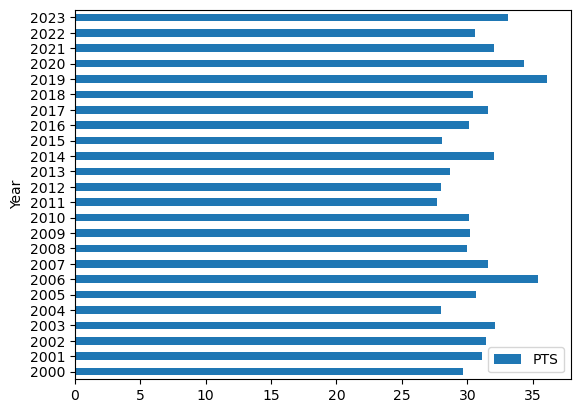

In [40]:
highest_scoring.plot.barh('Year', 'PTS')

Main one we look for: Correlations. This will give us some confidence to apply the data into machine learning.

<Axes: >

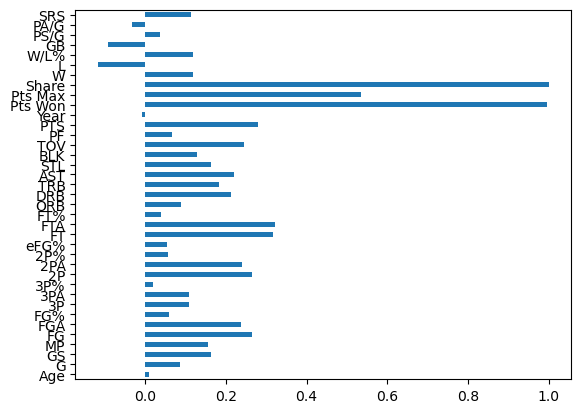

In [44]:
stats.corr(numeric_only=True)['Share'].plot.barh()

The weak and high correlations do tell us that this can result in something at the predictions. We'll proceed onto that in `3-mvp_predictions.ipynb`.